# Lab 2 - Data frames

Napisać program w języku C używającego interfejsu GSL do BLAS: funkcji gsl_blas_ddot (mnożenie dwóch wektorów) i gsl_blas_dgemv (mnożenie macierzy przez wektor).
Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.
Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.

In [1]:
#include <stdio.h>
#include <stdlib.h>
#include <gsl/gsl_ieee_utils.h>
#include <gsl/gsl_blas.h>
#include <sys/time.h>
#include <string.h>

int main(void){

    FILE *fp;
    fp = fopen("results.csv", "w+");
    fprintf(fp, "level;dim;time\n");

    struct timeval t1, t2;
    double elapsedTime;

    gsl_vector *v1;
    gsl_vector *v2;
    double result;

    gsl_matrix *A;
    gsl_vector *v3;
    gsl_vector *mulres;

    for(int dim=20; dim<1001; dim+=20){

            for(int step=0; step<10; step++){

                    v1 = gsl_vector_alloc(dim);
                    for(int i=0; i<dim; i++) gsl_vector_set(v1, i, rand()%10+i*1.47);

                    v2 = gsl_vector_alloc(dim);
                    for(int i=0; i<dim; i++) gsl_vector_set(v2, i, rand()%20+i*3.21);


                    //computing result = v1 * v2
                    gettimeofday(&t1, NULL);
                    gsl_blas_ddot(v1, v2, &result);
                    gettimeofday(&t2,NULL);

                    //time in millisec
                    elapsedTime = (t2.tv_sec - t1.tv_sec)*1000.0;
                    elapsedTime += (t2.tv_usec - t1.tv_usec)/1000.0;

                    fprintf(fp, "%d;%d;%lf\n", 1, dim, elapsedTime);

                    free(v1);
                    free(v2);
            }
    }



    for(int dim=20; dim<1001; dim+=20){

            for(int step=0; step<10; step++){

                    A = gsl_matrix_alloc(dim,dim);
                    for(int i=0; i<dim; i++)
                            for(int j=0; j<dim; j++)
                                    gsl_matrix_set(A, i, j, rand()%10+i+j*1.52);

                    v3 = gsl_vector_alloc(dim);
                    for(int i=0; i<dim; i++) gsl_vector_set(v3, i, rand()%10+i*4.17);

                    mulres = gsl_vector_alloc(dim);

                    // computing mulres = A * v3
                    gettimeofday(&t1, NULL);
                    gsl_blas_dgemv(CblasNoTrans, 1.0, A, v3, 0.0, mulres);
                    gettimeofday(&t2,NULL);

                    elapsedTime = (t2.tv_sec - t1.tv_sec)*1000.0;
                    elapsedTime += (t2.tv_usec - t1.tv_usec)/1000.0;

                    fprintf(fp, "%d;%d;%lf\n", 2, dim, elapsedTime);
                    free(A);
                    free(v3);
                    free(mulres);
            }
    }

}

SyntaxError: invalid syntax (<ipython-input-1-b8ca459e8e3c>, line 8)

Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.

In [1]:
using CSV
input="results.csv"
mydata=CSV.read(input, delim=";")

,level,dim,time
,Int64,Int64,Float64
1,1,20,0.014
2,1,20,0.002
3,1,20,0.002
4,1,20,0.002
5,1,20,0.002
6,1,20,0.002
7,1,20,0.002
8,1,20,0.001
9,1,20,0.002


Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy w tabelke za pomoca opcji layout
Należy zadbać o staranne podpisanie osi i wykresów.

In [2]:
using Statistics, DataFrames
dataGrouped=by(mydata, [:level, :dim], timeMean = :time => mean, std = :time => std)

,level,dim,timeMean,std
,Int64,Int64,Float64,Float64
1,1,20,0.003,0.0038873
2,1,40,0.0017,0.000483046
3,1,60,0.0022,0.00139841
4,1,80,0.0019,0.000316228
5,1,100,0.002,4.5714e-19
6,1,120,0.002,4.5714e-19
7,1,140,0.0021,0.000316228
8,1,160,0.002,4.5714e-19
9,1,180,0.0019,0.000316228


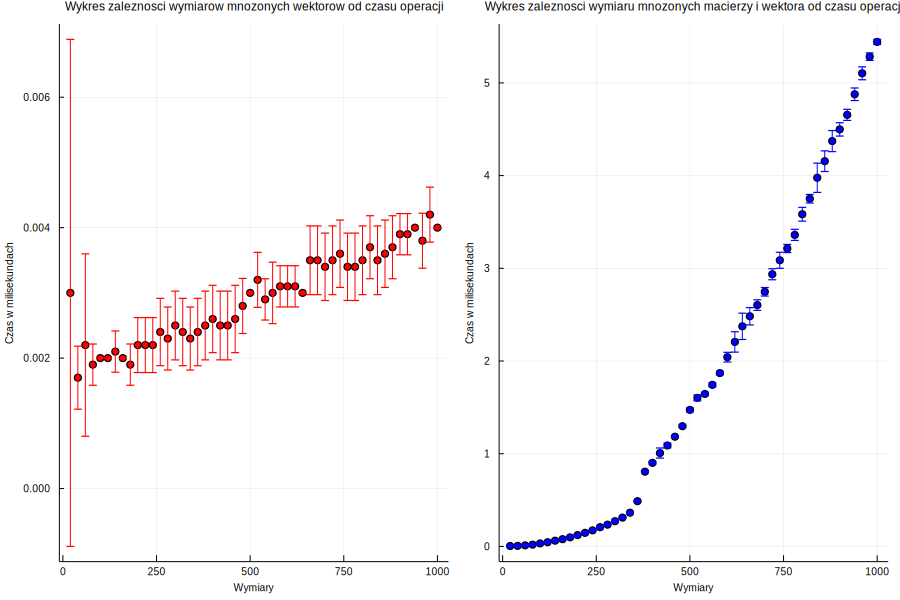

In [3]:
using Plots
scatter(dataGrouped[:dim], dataGrouped[:timeMean], group=dataGrouped[:level], colour=[:red :blue], 
    yerr=dataGrouped[:std], layout=2, size=(900,600), titlefontsize=8, legend=:none,
    title=["Wykres zaleznosci wymiarow mnozonych wektorow od czasu operacji" "Wykres zaleznosci wymiaru mnozonych macierzy i wektora od czasu operacji"],
    xaxis=("Wymiary", font(7)), yaxis=("Czas w milisekundach", font(7)))